# Final Year Project
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# WatchYourLanguage
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Intelligent Text Reader with Normalized Text 
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Group Members : 
##### Sibtain Raza Jamali
##### Zeeshan Ali
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### SuperVisor:
### Mr.Muhammad H Mustafa

#### This is an intelligent text-to-speech synthesizer. The first goal to achieve is  "Spoken Text".

# Iteration 1 

In [1]:
# lets start by importing some basic python libraries for analysis of data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning,Visualization ,Statistics


In [2]:
"""
This dataset is well structured ,lets import all the files
"""
training_set=pd.read_csv('en_train.csv')
training_set.head(15)

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of
5,0,5,PLAIN,plant,plant
6,0,6,PLAIN,in,in
7,0,7,PLAIN,family,family
8,0,8,PLAIN,Acanthaceae,Acanthaceae
9,0,9,PUNCT,.,.


In [6]:
training_set.shape

(9918441, 5)

# Training Data
### Number of training Examples = 9918441
### Number of features = 5

In [22]:
len(training_set['class'].unique())

16

There are 16 distinct classes of words

In [3]:
#lets print these classes 
training_set['class'].value_counts()

PLAIN         7353693
PUNCT         1880507
DATE           258348
LETTERS        152795
CARDINAL       133744
VERBATIM        78108
MEASURE         14783
ORDINAL         12703
DECIMAL          9821
MONEY            6128
DIGIT            5442
ELECTRONIC       5162
TELEPHONE        4024
TIME             1465
FRACTION         1196
ADDRESS           522
Name: class, dtype: int64

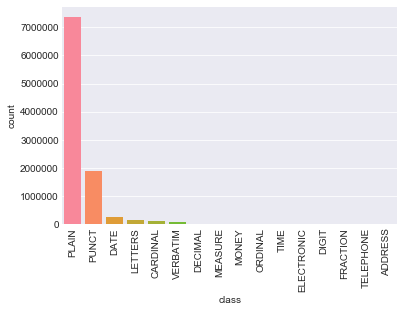

In [28]:
#sns.set_palette("hls")
#fig_size=(11,8)
#fig,axe=plt.subplots(figsize=fig_size)
sns.set_style("darkgrid")
figs=sns.countplot(training_set['class'],saturation=1)

figs.set_xticklabels(training_set['class'].unique(),rotation=90)
plt.show()

We can see seaborn is missing many distributions, So lets try bar plot

In [ ]:
sns.set_style("white")
fig=sns.barplot(training_set['class'],saturation=1)
figs.set_xticklabels(training_set['class'].unique(),rotation=90)
plt.show()

,Semiotic Class,Input Token,Output Token,Sentence Id
10,<eos>,<eos>,NaN,1
19,<eos>,<eos>,NaN,2
46,<eos>,<eos>,NaN,3
67,<eos>,<eos>,NaN,4
84,<eos>,<eos>,NaN,5
97,<eos>,<eos>,NaN,6
112,<eos>,<eos>,NaN,7
117,<eos>,<eos>,NaN,8
121,<eos>,<eos>,NaN,9
144,<eos>,<eos>,NaN,10


In [27]:
training_set_1['Semiotic Class'].unique()

MemoryError: 

0     NaN
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    1.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    2.0
Name: Sentence Id, dtype: float64

pandas.core.series.Series

,Semiotic Class,Input Token,Output Token
10,<eos>,<eos>,NaN
19,<eos>,<eos>,NaN
46,<eos>,<eos>,NaN
67,<eos>,<eos>,NaN
84,<eos>,<eos>,NaN
97,<eos>,<eos>,NaN
112,<eos>,<eos>,NaN
117,<eos>,<eos>,NaN
121,<eos>,<eos>,NaN
144,<eos>,<eos>,NaN


array(['PLAIN', 'PUNCT', 'DATE', 'LETTERS', 'CARDINAL', 'VERBATIM',
       'DECIMAL', 'MEASURE', 'MONEY', 'ORDINAL', 'TIME', 'ELECTRONIC',
       'DIGIT', 'FRACTION', 'TELEPHONE', 'ADDRESS'], dtype=object)

,Semiotic Class,Input Token,Output Token
1425793,PLAIN,Nan,<self>
1517694,PLAIN,Nan,<self>
2055931,PLAIN,Nan,<self>
2465385,PLAIN,Nan,<self>
3240941,PLAIN,Nan,<self>
3434304,PLAIN,Nan,<self>
4716520,PLAIN,Nan,<self>
5268872,PLAIN,Nan,<self>
5783072,PLAIN,Nan,<self>
5959373,PLAIN,Nan,<self>
